In [102]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('uaScoresDataFrame.csv')
df

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,...,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,...,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,...,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,...,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


In [105]:
#check for any incompletes or duplicates
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [106]:
# one hot encoding: categorizing the country and continent into numerical values
# ADD CITY NAME IF YOU WAnt, IDK IF YOU WANT TO USE IT
# You can also drop if not using.
df2 = pd.get_dummies(data=df, columns=['UA_Country','UA_Continent'])
df2.head()
#df2=df

,Unnamed: 0,UA_Name,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,...,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Country_Andorra,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,0,Aarhus,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,...,0,0,0,0,0,0,1,0,0,0
1,1,Adelaide,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,...,0,0,0,0,0,0,0,0,1,0
2,2,Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,...,0,0,0,0,0,0,0,1,0,0
3,3,Almaty,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,...,0,0,0,0,0,1,0,0,0,0
4,4,Amsterdam,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,...,0,0,0,0,0,0,1,0,0,0


In [107]:
df.dtypes

Unnamed: 0                 int64
UA_Name                   object
UA_Country                object
UA_Continent              object
Housing                  float64
Cost of Living           float64
Startups                 float64
Venture Capital          float64
Travel Connectivity      float64
Commute                  float64
Business Freedom         float64
Safety                   float64
Healthcare               float64
Education                float64
Environmental Quality    float64
Economy                  float64
Taxation                 float64
Internet Access          float64
Leisure & Culture        float64
Tolerance                float64
Outdoors                 float64
dtype: object

In [108]:
cols_to_scale = ['Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity','Commute', 'Business Freedom', 'Safety','Healthcare','Education','Environmental Quality','Economy','Taxation','Internet Access','Leisure & Culture', 'Tolerance','Outdoors']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2                 

,Unnamed: 0,UA_Name,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,...,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Country_Andorra,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,0,Aarhus,0.61315,0.4015,0.28270,0.2512,0.319579,0.938062,0.994000,0.955698,...,0,0,0,0,0,0,1,0,0,0
1,1,Adelaide,0.63095,0.4692,0.31365,0.2640,0.134368,0.793082,0.939967,0.760411,...,0,0,0,0,0,0,0,0,1,0
2,2,Albuquerque,0.72620,0.6059,0.37720,0.1493,0.100579,0.751393,0.867100,0.000000,...,0,0,0,0,0,0,0,1,0,0
3,3,Almaty,0.92820,0.9333,0.24585,0.0000,0.430737,0.872594,0.556800,0.689135,...,0,0,0,0,0,1,0,0,0,0
4,4,Amsterdam,0.30530,0.3824,0.79715,0.6107,0.823632,0.909341,0.883667,0.827124,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,0.75525,0.5882,0.37965,0.0000,0.102684,0.758639,0.896600,0.539710,...,0,0,0,0,0,0,0,1,0,0
262,262,Wroclaw,0.84520,0.8434,0.35860,0.2386,0.183632,0.736383,0.570433,0.788078,...,0,0,0,0,0,0,1,0,0,0
263,263,Yerevan,0.96945,0.9431,0.39265,0.0000,0.135474,0.839600,0.650100,0.869809,...,0,0,0,0,0,1,0,0,0,0
264,264,Zagreb,0.89100,0.7194,0.44530,0.1775,0.160842,0.717842,0.572033,0.844914,...,0,0,0,0,0,0,1,0,0,0


We plot the correlation matrix for the different columns, we can get an idea of which columns are correlated from this figure

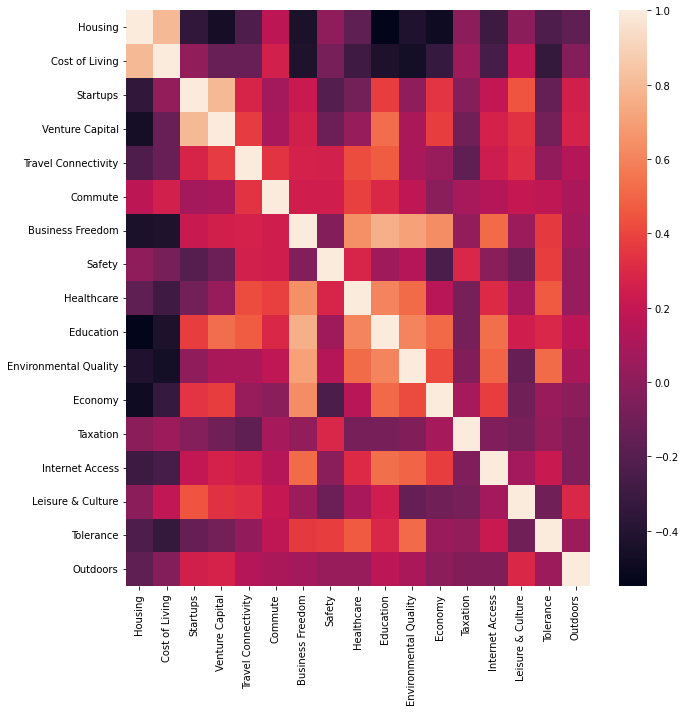

In [193]:
df3 = df2[df2.columns[1:19]]

fig, ax = plt.subplots(figsize=(10,10))  

hm = sns.heatmap(df3.corr());
fig = hm.get_figure()
ax.figure.tight_layout()
fig.savefig('heatmap.jpg')

We then remove duplicate values and columns that are correlated with themselves and save it in a file

In [110]:
c = df3.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")
filtered_list = so[so>=0][::-2]
non_ones = filtered_list[filtered_list!=1.000]
non_ones.to_csv("correlation_list_reverse.csv")

df4=df3.drop(columns=["UA_Name"])


We create 4 categories using the correlations we have derived

In [111]:
import pandas as pd
import scipy.cluster.hierarchy as spc


df5 = df4.drop(columns=["Unnamed: 0"])
corr = df5.corr().values
print(df5.columns)
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
dict = {}
for i in range(len(idx)):
    if dict.get(idx[i]):
        dict[idx[i]].append(df5.columns[i])
    else:
        dict[idx[i]]= [df5.columns[i]]
dict

Index(['Housing', 'Cost of Living', 'Startups', 'Venture Capital',
       'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety',
       'Healthcare', 'Education', 'Environmental Quality', 'Economy',
       'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance',
       'Outdoors'],
      dtype='object')


{1: ['Housing', 'Cost of Living'],
 4: ['Startups',
  'Venture Capital',
  'Travel Connectivity',
  'Commute',
  'Leisure & Culture',
  'Outdoors'],
 3: ['Business Freedom',
  'Healthcare',
  'Education',
  'Environmental Quality',
  'Economy',
  'Internet Access',
  'Tolerance'],
 2: ['Safety', 'Taxation']}

We create a representatuve value for each category from its columns

In [112]:
df4['category1']= df4['Housing']*df4['Cost of Living']
df4['category2']= df4['Travel Connectivity']*df4['Commute']*df4['Startups']*df4['Venture Capital']*df4['Leisure & Culture']*df4['Outdoors']
df4['category3']= df4['Business Freedom']*df4['Healthcare']*df4['Education']*df4['Environmental Quality']*df4['Economy']*df4['Internet Access']*df4['Tolerance']
df4['category4']= df4['Safety']*df4['Taxation']

In [113]:
df4['Vacation Lovers']= df4['Startups']*df4['Venture Capital']*df4['Business Freedom']*df4['Taxation']*df4['Economy']
df4['Entrepreneur & Business person']= df4['Travel Connectivity']*df4['Commute']*df4['Leisure & Culture']*df4['Internet Access']
df4['Stability Seeker']= df4['Housing']*df4['Cost of Living']*df4['Tolerance']*df4['Outdoors']
df4['Family']= df4['Safety']*df4['Healthcare']*df4['Education']*df4['Environmental Quality']

We then normalized this combined categorical data

In [114]:
df6 = df4[['category1','category2','category3','category4']]
df7 = df4[['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']]
cols_to_scale =['category1','category2','category3','category4']
scaler = MinMaxScaler()
df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])
scaler = MinMaxScaler()
cols_to_scale =['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']
df7[cols_to_scale] = scaler.fit_transform(df7[cols_to_scale])


/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/ipykernel_16001/531199345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])
/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/ipykernel_16001/531199345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7[cols_to_scale] = scaler.fit_transform(df7[cols_to_scale])


In [115]:
df7

,Vacation Lovers,Entrepreneur & Business person,Stability Seeker,Family
0,0.028931,0.103923,0.182111,0.656049
1,0.035464,0.022736,0.233708,0.504018
2,0.022465,0.023967,0.182452,0.000000
3,0.000000,0.030715,0.543812,0.045265
4,0.177814,0.345436,0.095555,0.590787
...,...,...,...,...
261,0.000000,0.021025,0.213622,0.231677
262,0.019616,0.045115,0.156158,0.195357
263,0.000000,0.023052,0.966565,0.000000
264,0.013914,0.034315,0.442353,0.276525


In [116]:
df6

,category1,category2,category3,category4
0,0.246180,0.007213,0.761387,0.463056
1,0.296042,0.005627,0.301294,0.329761
2,0.440005,0.001838,0.193978,0.000000
3,0.866289,0.000000,0.006935,0.586373
4,0.116747,0.455483,0.290757,0.390846
...,...,...,...,...
261,0.444238,0.000000,0.171281,0.387815
262,0.712842,0.005769,0.029773,0.384265
263,0.914288,0.000000,0.000000,0.697020
264,0.640985,0.005752,0.041108,0.671559


=======Assigninng weight part=======

as we can see from df6 and df7 above,, the value for each category is unbalanced, we have to set a new weight to each column

In [117]:
# process data: normalize each column, keep the 'UA_Continent' column
data_con=df.drop(columns=['Unnamed: 0'])
column_list=list(df.columns)
cols_to_scale = column_list[4:]
scaler = MinMaxScaler()
data_con[cols_to_scale] = scaler.fit_transform(data_con[cols_to_scale])

#we use data_con in this part
data_con

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Aarhus,Denmark,Europe,0.61315,0.4015,0.28270,0.2512,0.319579,0.938062,0.994000,0.955698,0.933875,0.552621,0.740848,0.520394,0.480842,0.845916,0.31870,1.000000,0.488363
1,Adelaide,Australia,Oceania,0.63095,0.4692,0.31365,0.2640,0.134368,0.793082,0.939967,0.760411,0.851513,0.529503,0.818781,0.646379,0.430368,0.383318,0.43285,0.769997,0.676846
2,Albuquerque,New Mexico,North America,0.72620,0.6059,0.37720,0.1493,0.100579,0.751393,0.867100,0.000000,0.689865,0.427556,0.705833,0.693770,0.404842,0.504360,0.48900,0.674767,0.405691
3,Almaty,Kazakhstan,Asia,0.92820,0.9333,0.24585,0.0000,0.430737,0.872594,0.556800,0.689135,0.487698,0.235094,0.319074,0.561129,0.844421,0.216384,0.29370,0.616082,0.672676
4,Amsterdam,Netherlands,Europe,0.30530,0.3824,0.79715,0.6107,0.823632,0.909341,0.883667,0.827124,0.848366,0.636392,0.736855,0.538126,0.468947,0.404199,0.88740,0.835524,0.646711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Winnipeg,Canada,North America,0.75525,0.5882,0.37965,0.0000,0.102684,0.758639,0.896600,0.539710,0.832094,0.550304,0.522129,0.621991,0.713105,0.447740,0.46880,0.630423,0.503565
262,Wroclaw,Poland,Europe,0.84520,0.8434,0.35860,0.2386,0.183632,0.736383,0.570433,0.788078,0.727559,0.428535,0.442828,0.507082,0.483895,0.546294,0.47495,0.299850,0.482309
263,Yerevan,Armenia,Asia,0.96945,0.9431,0.39265,0.0000,0.135474,0.839600,0.650100,0.869809,0.547386,0.000000,0.384162,0.368264,0.795263,0.332721,0.47370,0.712931,0.978945
264,Zagreb,Croatia,Europe,0.89100,0.7194,0.44530,0.1775,0.160842,0.717842,0.572033,0.844914,0.779558,0.330656,0.707173,0.238179,0.788789,0.462770,0.49945,0.785899,0.579712


In [118]:
# define parameters

#category_list from correlation heatmap
category_list=[['Housing', 'Cost of Living'],
               ['Travel Connectivity','Commute','Startups','Venture Capital','Leisure & Culture','Outdoors'],
               ['Business Freedom','Healthcare','Education','Environmental Quality','Economy','Internet Access','Tolerance'],
               ['Safety', 'Taxation']]

#manual_list from manually selected categories
manual_list=[['Startups','Venture Capital','Business Freedom','Taxation','Economy'],
            ['Travel Connectivity','Commute','Leisure & Culture','Internet Access'],
            ['Housing','Cost of Living','Tolerance','Outdoors'],
            ['Safety','Healthcare','Education','Environmental Quality']]


color_list=['black','red','yellow','green','blue','purple','orange']

plots for category1-4 on continents

check the invariance of data based on continent

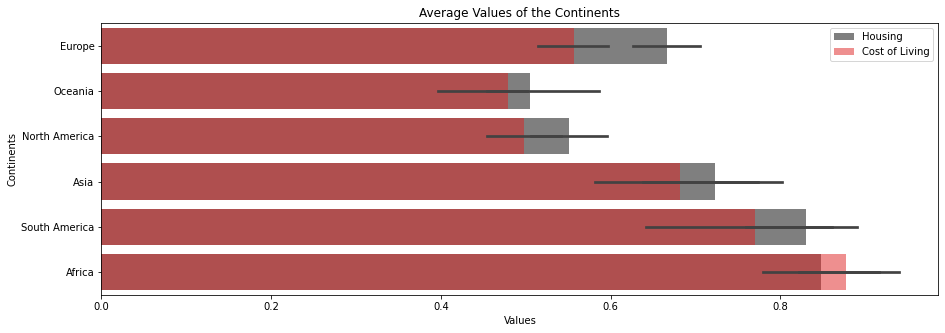

In [119]:
#plot bar on continents for category1
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[0])):
    sns.barplot(y='UA_Continent',x=category_list[0][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[0][i])


plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

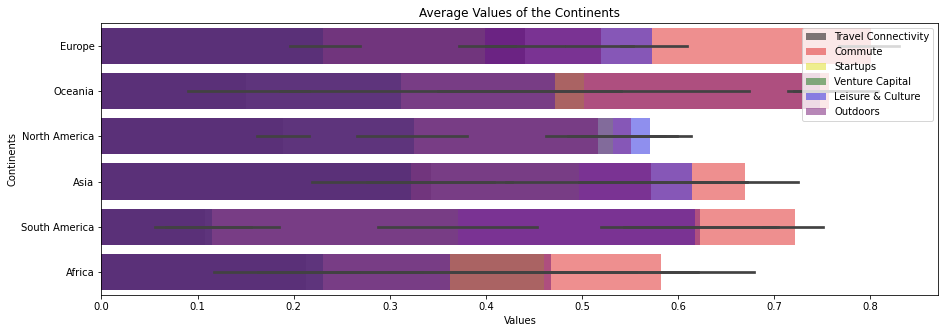

In [120]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[1])):
    sns.barplot(y='UA_Continent',x=category_list[1][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[1][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

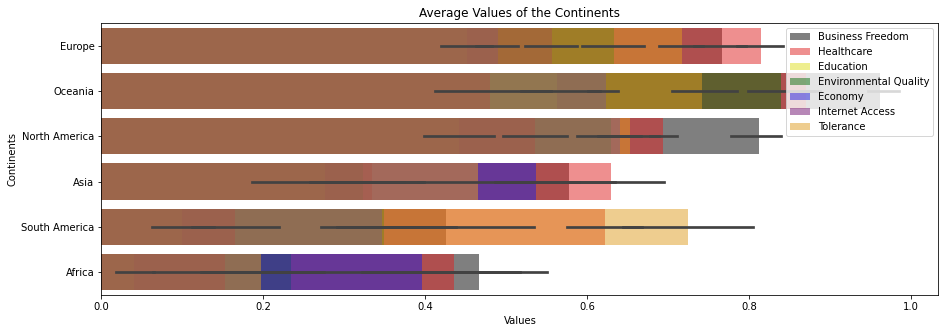

In [121]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[2])):
    sns.barplot(y='UA_Continent',x=category_list[2][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[2][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

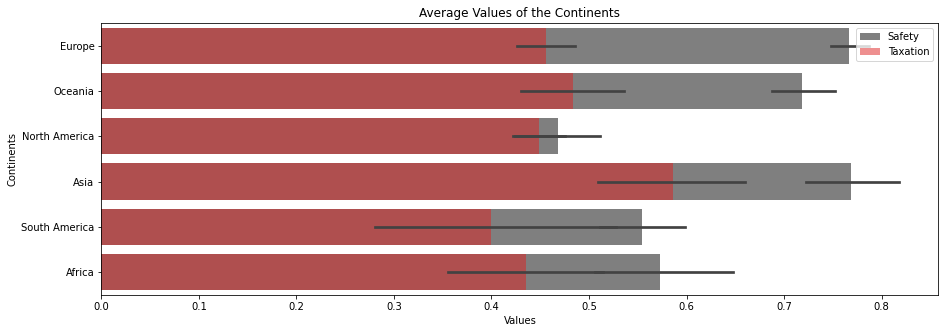

In [122]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[3])):
    sns.barplot(y='UA_Continent',x=category_list[3][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[3][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

In [123]:
# check the mean value of each column 
df_temp=data_con[cols_to_scale]*10
df_mean=df_temp.mean()
df_var=df_temp.var()
print('mean\n',df_mean,'\n')
print('var\n',df_var)
df_temp
### var does not vary much, we just have to ajust the mean value to the same level.
### annother approach would be ajust the mean value according to each continent(haven't tried out yet)

mean
 Housing                  6.467271
Cost of Living           5.745940
Startups                 4.595295
Venture Capital          2.702515
Travel Connectivity      3.102070
Commute                  6.883807
Business Freedom         7.330762
Safety                   6.501629
Healthcare               7.291946
Education                3.949360
Environmental Quality    5.671994
Economy                  5.386732
Taxation                 4.687574
Internet Access          4.824476
Leisure & Culture        5.710068
Tolerance                6.464737
Outdoors                 5.371775
dtype: float64 

var
 Housing                  5.264649
Cost of Living           5.988317
Startups                 4.634723
Venture Capital          6.520081
Travel Connectivity      4.847544
Commute                  5.123894
Business Freedom         4.449684
Safety                   4.071156
Healthcare               2.527794
Education                5.193259
Environmental Quality    6.037395
Economy             

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,6.1315,4.015,2.8270,2.512,3.195789,9.380620,9.940000,9.556980,9.338745,5.526207,7.408483,5.203940,4.808421,8.459156,3.1870,10.000000,4.883627
1,6.3095,4.692,3.1365,2.640,1.343684,7.930817,9.399667,7.604113,8.515128,5.295026,8.187809,6.463791,4.303684,3.833180,4.3285,7.699970,6.768465
2,7.2620,6.059,3.7720,1.493,1.005789,7.513933,8.671000,0.000000,6.898648,4.275564,7.058331,6.937700,4.048421,5.043598,4.8900,6.747675,4.056908
3,9.2820,9.333,2.4585,0.000,4.307368,8.725942,5.568000,6.891353,4.876976,2.350942,3.190741,5.611289,8.444211,2.163837,2.9370,6.160816,6.726759
4,3.0530,3.824,7.9715,6.107,8.236316,9.093409,8.836667,8.271241,8.483656,6.363917,7.368553,5.381257,4.689474,4.041992,8.8740,8.355236,6.467106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,7.5525,5.882,3.7965,0.000,1.026842,7.586386,8.966000,5.397100,8.320936,5.503038,5.221288,6.219915,7.131053,4.477398,4.6880,6.304230,5.035652
262,8.4520,8.434,3.5860,2.386,1.836316,7.363826,5.704333,7.880783,7.275588,4.285347,4.428280,5.070820,4.838947,5.462942,4.7495,2.998500,4.823086
263,9.6945,9.431,3.9265,0.000,1.354737,8.396002,6.501000,8.698088,5.473857,0.000000,3.841622,3.682641,7.952632,3.327214,4.7370,7.129313,9.789452
264,8.9100,7.194,4.4530,1.775,1.608421,7.178420,5.720333,8.449142,7.795580,3.306560,7.071734,2.381789,7.887895,4.627696,4.9945,7.858986,5.797121


Assign weight to 2 parallel cases: 

### method
- get mean for each column
- adjust the mean value of each column to around 5, keep the variance unmodified 
- the value for each category = avg(each column in this category)

In [124]:
for item in cols_to_scale:
    df_temp[item]=df_temp[item]-df_mean.loc[item]+5

df_temp

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,4.664229,3.26906,3.231705,4.809485,5.093720,7.496812,7.609238,8.055351,7.046799,6.576847,6.736489,4.817209,5.120847,8.634680,2.476932,8.535263,4.511852
1,4.842229,3.94606,3.541205,4.937485,3.241615,6.047009,7.068905,6.102483,6.223181,6.345666,7.515815,6.077060,4.616110,4.008704,3.618432,6.235233,6.396690
2,5.794729,5.31306,4.176705,3.790485,2.903720,5.630126,6.340238,-1.501629,4.606702,5.326204,6.386337,6.550968,4.360847,5.219122,4.179932,5.282937,3.685134
3,7.814729,8.58706,2.863205,2.297485,6.205299,6.842135,3.237238,5.389724,2.585029,3.401582,2.518747,5.224557,8.756636,2.339361,2.226932,4.696079,6.354984
4,1.585729,3.07806,8.376205,8.404485,10.134246,7.209601,6.505905,6.769612,6.191710,7.414557,6.696559,4.994525,5.001899,4.217516,8.163932,6.890498,6.095331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,6.085229,5.13606,4.201205,2.297485,2.924772,5.702579,6.635238,3.895471,6.028989,6.553678,4.549294,5.833183,7.443478,4.652922,3.977932,4.839493,4.663877
262,6.984729,7.68806,3.990705,4.683485,3.734246,5.480018,3.373571,6.379154,4.983642,5.335986,3.756286,4.684088,5.151373,5.638466,4.039432,1.533762,4.451311
263,8.227229,8.68506,4.331205,2.297485,3.252667,6.512195,4.170238,7.196459,3.181911,1.050640,3.169628,3.295910,8.265057,3.502738,4.026932,5.664575,9.417678
264,7.442729,6.44806,4.857705,4.072485,3.506351,5.294613,3.389571,6.947513,5.503633,4.357199,6.399740,1.995058,8.200321,4.803220,4.284432,6.394248,5.425346


In [125]:
df4['category1']= (df4['Housing']+df4['Cost of Living'])/2
df4['category2']= (df4['Travel Connectivity']+df4['Commute']+df4['Startups']+df4['Venture Capital']+df4['Leisure & Culture']+df4['Outdoors'])/6
df4['category3']= (df4['Business Freedom']+df4['Healthcare']+df4['Education']+df4['Environmental Quality']+df4['Economy']+df4['Internet Access']+df4['Tolerance'])/7
df4['category4']= (df4['Safety']+df4['Taxation'])/2

In [126]:
df4['Vacation Lovers']= (df4['Startups']+df4['Venture Capital']+df4['Business Freedom']+df4['Taxation']+df4['Economy'])/5
df4['Entrepreneur & Business person']= (df4['Travel Connectivity']+df4['Commute']+df4['Leisure & Culture']+df4['Internet Access'])/4
df4['Stability Seeker']= (df4['Housing']+df4['Cost of Living']+df4['Tolerance']+df4['Outdoors'])/4
df4['Family']= (df4['Safety']+df4['Healthcare']+df4['Education']+df4['Environmental Quality'])/4

In [127]:
df8 = df4[['category1','category2','category3','category4']]
df9 = df4[['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']]
cols_to_scale =['category1','category2','category3','category4']
scaler = MinMaxScaler()
df8[cols_to_scale] = scaler.fit_transform(df8[cols_to_scale])
df8=df8*10
scaler = MinMaxScaler()
cols_to_scale =['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']
df9[cols_to_scale] = scaler.fit_transform(df9[cols_to_scale])
df9=df9*10


/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/ipykernel_16001/3685365518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8[cols_to_scale] = scaler.fit_transform(df8[cols_to_scale])
/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/ipykernel_16001/3685365518.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9[cols_to_scale] = scaler.fit_transform(df9[cols_to_scale])


In [128]:
df8=df8.round(2)
df8

,category1,category2,category3,category4
0,5.07,4.54,9.78,6.50
1,5.50,4.57,8.28,4.95
2,6.66,3.88,7.42,0.00
3,9.31,4.37,3.80,7.11
4,3.44,8.70,8.15,5.61
...,...,...,...,...
261,6.72,3.76,7.27,5.34
262,8.44,4.29,5.02,5.46
263,9.56,4.98,3.80,7.94
264,8.05,4.50,5.83,7.74


In [129]:
df9=df9.round(2)
df9

,Vacation Lovers,Entrepreneur & Business person,Stability Seeker,Family
0,4.99,6.20,5.69,8.89
1,5.16,4.29,5.86,8.01
2,4.90,4.58,5.33,3.49
3,4.20,4.49,8.21,3.12
4,6.91,7.89,4.39,8.36
...,...,...,...,...
261,5.20,4.39,5.59,5.95
262,4.07,4.85,5.56,5.73
263,4.19,4.40,9.99,3.40
264,4.23,4.57,7.53,6.82


-------Getting Weights (importance) of each category for classifying given city into four categories ------

In [130]:
#first we cluster given data into four clusters using k means clustering
from sklearn.cluster import KMeans

In [131]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [132]:
df.head()

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [133]:
df10 = df.drop(columns=['UA_Name','Unnamed: 0'])
df10.head()

,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [134]:
from sklearn.preprocessing import LabelEncoder, normalize

In [135]:
le = LabelEncoder()
df10['UA_Country'] = le.fit_transform(df10['UA_Country'])
df10['UA_Continent'] = le.fit_transform(df10['UA_Continent'])

In [136]:
df10['UA_Country'] = (df10['UA_Country']).astype('category')
df10['UA_Continent'] = (df10['UA_Continent']).astype('category')

In [137]:
df11 = normalize(df10)

In [138]:
kmeans.fit(df11)

KMeans(init='random', n_clusters=4, random_state=42)

In [139]:
#get labels of cities based on above clusters
y = kmeans.labels_
X = df11

In [140]:
import xgboost as xgb

In [141]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [143]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)

In [144]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[03:16:11] WARNING: /private/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/pip-install-z334emwh/xgboost_59c955c298e04ab0a3c0f60b36b77eba/build/temp.macosx-12-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [145]:
accuracy_score(preds,y_test)

0.8148148148148148

----how decision is made with what threshold on classifying given city into one of four categories---

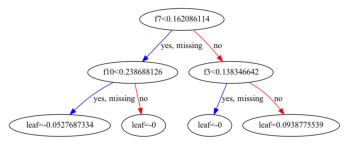

In [146]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

--- importance of each feature in classifying each city into one of four categories---

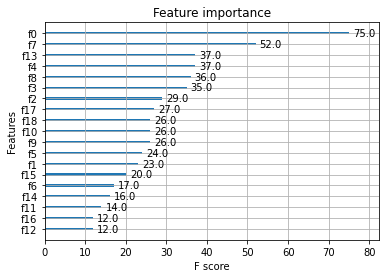

In [147]:
xgb.plot_importance(xg_reg)
plt.show()

In [148]:
xg_reg.feature_importances_

array([0.17438884, 0.0298037 , 0.02954494, 0.01678403, 0.0263924 ,
       0.01982021, 0.00579216, 0.05582754, 0.08438015, 0.0709011 ,
       0.07257157, 0.02540347, 0.01838863, 0.08681645, 0.02864513,
       0.00758184, 0.02074236, 0.11462753, 0.11158802], dtype=float32)

********** Visualize the top cities for each categories **********

In [149]:
df12 = df8.copy()
df12["UA_Name"] = df["UA_Name"]
df12["UA_Country"] = df["UA_Country"].map(lambda x: x.strip())
df12["UA_Continent"] = df["UA_Continent"]
df12

,category1,category2,category3,category4,UA_Name,UA_Country,UA_Continent
0,5.07,4.54,9.78,6.50,Aarhus,Denmark,Europe
1,5.50,4.57,8.28,4.95,Adelaide,Australia,Oceania
2,6.66,3.88,7.42,0.00,Albuquerque,New Mexico,North America
3,9.31,4.37,3.80,7.11,Almaty,Kazakhstan,Asia
4,3.44,8.70,8.15,5.61,Amsterdam,Netherlands,Europe
...,...,...,...,...,...,...,...
261,6.72,3.76,7.27,5.34,Winnipeg,Canada,North America
262,8.44,4.29,5.02,5.46,Wroclaw,Poland,Europe
263,9.56,4.98,3.80,7.94,Yerevan,Armenia,Asia
264,8.05,4.50,5.83,7.74,Zagreb,Croatia,Europe


In [150]:
def getLabel(pdse):
    label=[]
    for item in pdse.value_counts().to_dict():
        label.append(item)
    return label

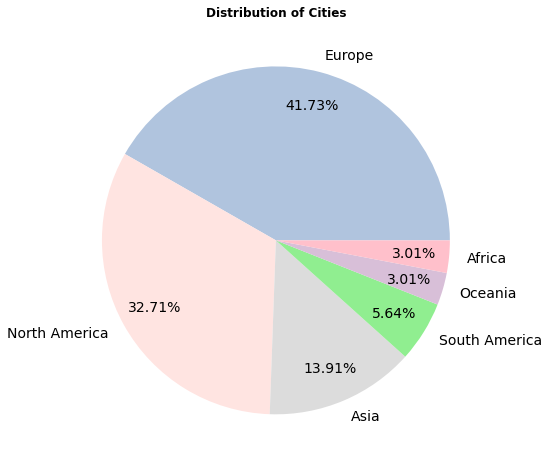

In [151]:
label = getLabel(df12["UA_Continent"])
colors = ['lightsteelblue', 'mistyrose', 'gainsboro', 'lightgreen', 'thistle', 'pink']
plt.figure(figsize=(20,8))
plt.title("Distribution of Cities", fontsize='large', fontweight='bold', color = 'k')
plt.pie(df12["UA_Continent"].value_counts(),shadow=False, pctdistance=0.8, textprops={'fontsize':14, 'color':'black'}, labels= label, colors = colors, autopct='%1.2f%%')
plt.show()

In [152]:
# df12_world = df12.copy()
# df12_world_c1 = df12_world.sort_values('category1', ascending=False)
# # df12_world_c1
# label_c1 = getLabel(df12_world_c1["UA_Continent"].head(100))
# plt.figure(figsize=(20,8))
# plt.title("Distribution of Top 100 Cities for Category 1: Housing, Cost of Living", fontsize='large', fontweight='bold', color = 'k')
# plt.pie(df12_world_c1["UA_Continent"].head(100).value_counts(),shadow=False, pctdistance=0.8, textprops={'fontsize':14, 'color':'k'}, labels= label_c1, colors = colors, autopct='%1.2f%%')
# plt.show()

In [153]:
# df12_world_c2 = df12_world.sort_values('category2', ascending=False)
# # df12_world_c2
# label_c2 = getLabel(df12_world_c2["UA_Continent"].head(100))
# plt.figure(figsize=(20,8))
# plt.title("Distribution of Top 100 Cities for Category 2: \n\n Startups, Venture Capital, Travel Connectivity, Commute, Leisure & Culture, Outdoors", fontsize='large', fontweight='bold', color = 'k')
# plt.pie(df12_world_c2["UA_Continent"].head(100).value_counts(), labels= label_c2, shadow=False, pctdistance=0.8, textprops={'fontsize':14, 'color':'k'}, colors = colors, autopct='%1.2f%%')
# plt.show()

In [154]:
# df12_world_c3 = df12_world.sort_values('category3', ascending=False)
# # df12_world_c3
# label_c3 = getLabel(df12_world_c3["UA_Continent"].head(100))
# plt.figure(figsize=(20,8))
# plt.title("Distribution of Top 100 Cities for Category 3: \n\n Business freedom, Healthcare, Education, Environmental Quality, Economy, Internet Access, Tolerance", fontsize='large', fontweight='bold', color = 'k')
# plt.pie(df12_world_c3["UA_Continent"].head(100).value_counts(), labels= label_c3, shadow=False, pctdistance=0.8, textprops={'fontsize':14, 'color':'k'}, colors = colors, autopct='%1.2f%%')
# plt.show()

In [155]:
# df12_world_c4 = df12_world.sort_values('category4', ascending=False)
# # df12_world_c4
# label_c4 = getLabel(df12_world_c4["UA_Continent"].head(100))
# plt.figure(figsize=(20,8))
# plt.title("Distribution of Top 100 Cities for Category 4: \n\n Safety, taxation", fontsize='large', fontweight='bold', color = 'k')
# plt.pie(df12_world_c4["UA_Continent"].head(100).value_counts(), labels= label_c4, shadow=False, pctdistance=0.8, textprops={'fontsize':14, 'color':'k'}, colors = colors, autopct='%1.2f%%')
# plt.show()

In [156]:
# df13 = df9.copy()
# df13["UA_Name"] = df["UA_Name"]
# df13["UA_Country"] = df["UA_Country"].map(lambda x: x.strip())
# df13["UA_Continent"] = df["UA_Continent"]
# df13
# df13_world = df13.copy()
# df13_world_vl = df13_world.sort_values('Vacation Lovers', ascending=False)
# # df13_world_vl
# label_vl = getLabel(df13_world_vl["UA_Continent"].head(100))
# plt.figure(figsize=(20,8))
# plt.title("Distribution of Top 100 Cities for Category 1: Vacation Lovers", fontsize='large', fontweight='bold', color = 'k')
# plt.pie(df13_world_vl["UA_Continent"].head(100).value_counts(),shadow=False, pctdistance=0.8, textprops={'fontsize':14, 'color':'k'}, labels= label_vl, colors = colors, autopct='%1.2f%%')
# plt.show()

Visualizations on US cities - Categories

In [157]:
us_state = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida","Georgia", 
            "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", 
            "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey",
            "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina",
            "South Dakota", "Tennessee", "Texas", "Utah", "Vermont","Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [158]:
df12_us_category = df12.loc[df12["UA_Country"].isin(us_state)]
df12_us_category = df12_us_category.loc[df12_us_category["UA_Continent"].isin(["North America"])]
df12_us_category

,category1,category2,category3,category4,UA_Name,UA_Country,UA_Continent
2,6.66,3.88,7.42,0.00,Albuquerque,New Mexico,North America
5,4.29,3.52,7.61,1.83,Anchorage,Alaska,North America
8,5.58,2.08,7.70,3.09,Asheville,North Carolina,North America
11,5.11,7.50,6.94,0.87,Atlanta,Georgia,North America
13,4.84,6.41,8.48,2.99,Austin,Texas,North America
...,...,...,...,...,...,...,...
212,1.81,9.04,8.59,3.28,San Francisco Bay Area,California,North America
215,0.86,2.09,8.57,4.98,San Luis Obispo,California,North America
222,3.04,7.80,7.99,3.41,Seattle,Washington,North America
229,6.23,5.84,7.95,1.66,St. Louis,Missouri,North America


The order of cities for Category 1

In [159]:
df12_us_c1 = df12_us_category.sort_values("category1", ascending=False)
df12_us_c1 = df12_us_c1.drop(axis=1, columns=['category2','category3','category4'])
# df12_us_c1

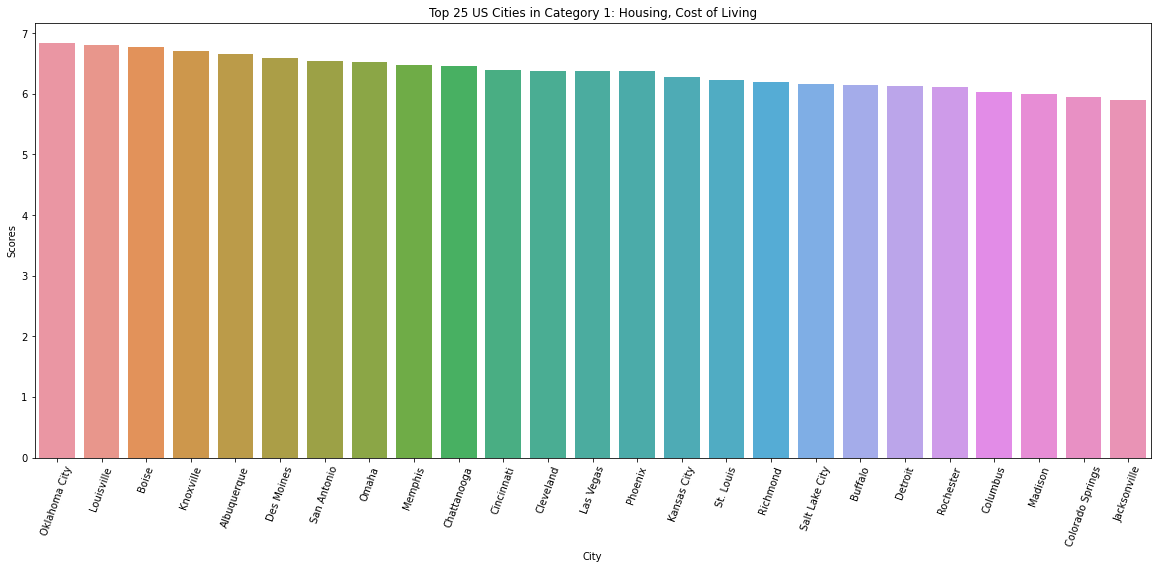

In [160]:
df12_us_c1_score = pd.DataFrame(zip(df12_us_c1['category1'], df12_us_c1['UA_Name']))
df12_us_c1_score.columns = ['Scores', 'City']
new_index=(df12_us_c1_score['Scores']).index.values
df12_us_c1_score = df12_us_c1_score.reindex(new_index)
df12_us_c1_score
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Scores',data=df12_us_c1_score[:25])
plt.title('Top 25 US Cities in Category 1: Housing, Cost of Living')
plt.xticks(rotation=70)
plt.show()

In [161]:
rank = 1
rank_c1 = []
for idx, row in df12_us_c1.iterrows():
    temp_dict = {}
    temp_dict["Rank"] = rank
    temp_dict["City"] = row["UA_Name"]
    temp_dict["State"] = row["UA_Country"]
    rank_c1.append(temp_dict)
    rank+=1
# rank_c1

The order of cities for Category 2

In [162]:
df12_us_c2 = df12_us_category.sort_values("category2", ascending=False)
df12_us_c2 = df12_us_c2.drop(axis=1, columns=['category1','category3','category4'])
# df12_us_c2

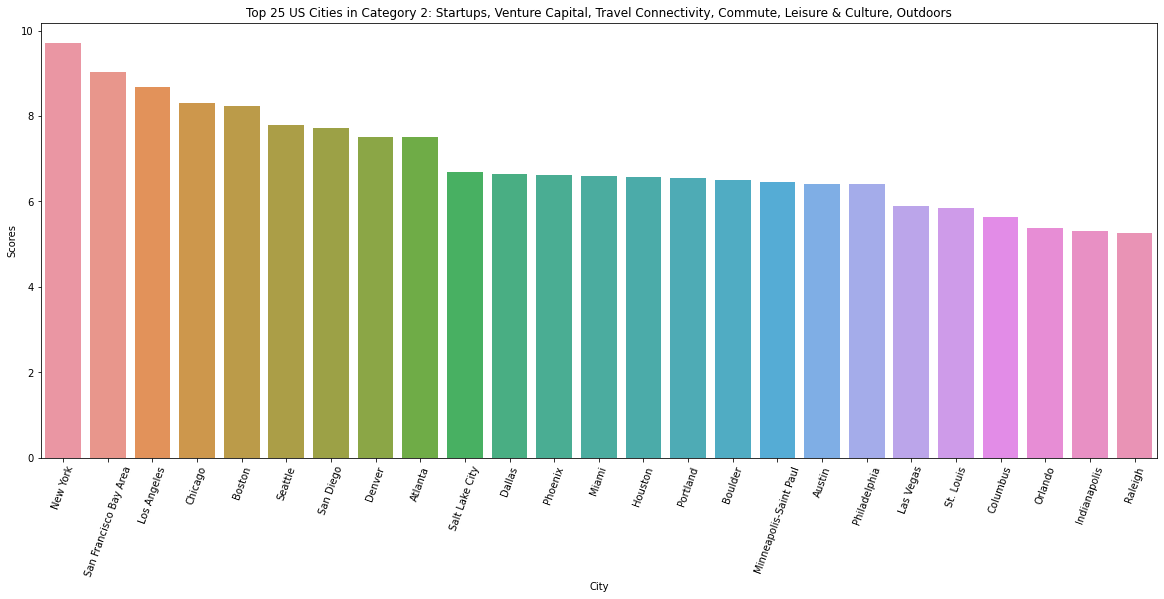

In [163]:
df12_us_c2_score = pd.DataFrame(zip(df12_us_c2['category2'], df12_us_c2['UA_Name']))
df12_us_c2_score.columns = ['Scores', 'City']
new_index=(df12_us_c2_score['Scores']).index.values
df12_us_c2_score = df12_us_c2_score.reindex(new_index)
# df12_us_c2_score
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Scores',data=df12_us_c2_score[:25])
plt.title('Top 25 US Cities in Category 2: Startups, Venture Capital, Travel Connectivity, Commute, Leisure & Culture, Outdoors')
plt.xticks(rotation=70)
plt.show()

In [164]:
rank = 1
rank_c2 = []
for idx, row in df12_us_c2.iterrows():
    temp_dict = {}
    temp_dict["Rank"] = rank
    temp_dict["City"] = row["UA_Name"]
    temp_dict["State"] = row["UA_Country"]
    rank_c2.append(temp_dict)
    rank+=1
# rank_c2

The order of cities for Category 3

In [165]:
df12_us_c3 = df12_us_category.sort_values("category3", ascending=False)
df12_us_c3 = df12_us_c3.drop(axis=1, columns=['category1','category2','category4'])
# df12_us_c3

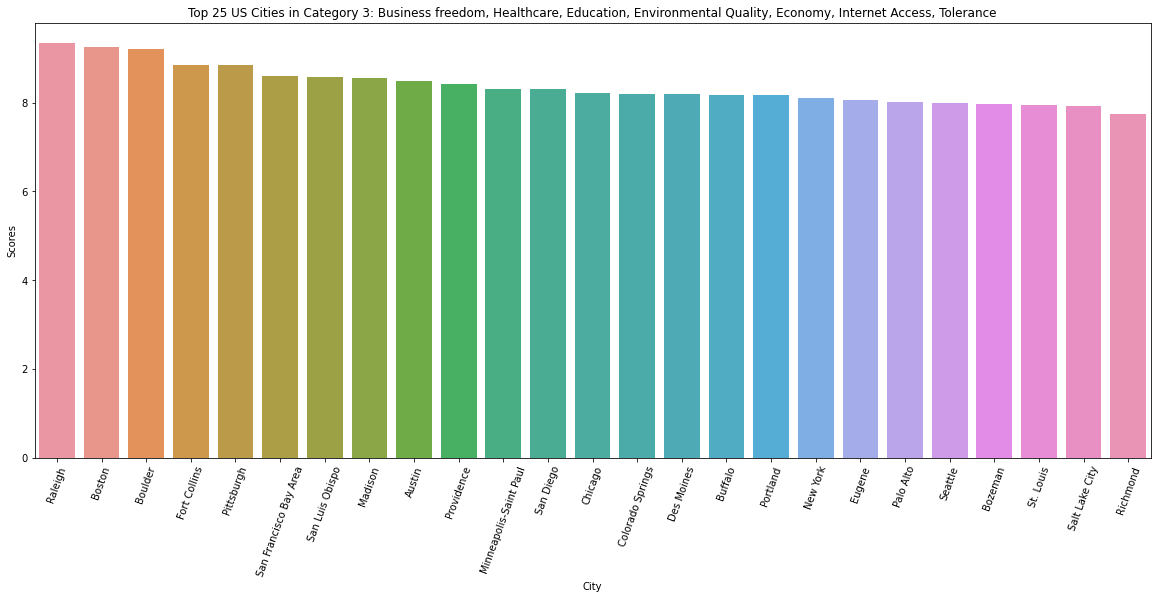

In [166]:
df12_us_c3_score = pd.DataFrame(zip(df12_us_c3['category3'], df12_us_c3['UA_Name']))
df12_us_c3_score.columns = ['Scores', 'City']
new_index=(df12_us_c3_score['Scores']).index.values
df12_us_c3_score = df12_us_c3_score.reindex(new_index)
# df12_us_c2_score
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Scores',data=df12_us_c3_score[:25])
plt.title('Top 25 US Cities in Category 3: Business freedom, Healthcare, Education, Environmental Quality, Economy, Internet Access, Tolerance')
plt.xticks(rotation=70)
plt.show()

In [167]:
rank = 1
rank_c3 = []
for idx, row in df12_us_c3.iterrows():
    temp_dict = {}
    temp_dict["Rank"] = rank
    temp_dict["City"] = row["UA_Name"]
    temp_dict["State"] = row["UA_Country"]
    rank_c3.append(temp_dict)
    rank+=1
# rank_c3

The order of cities for Category 4

In [168]:
df12_us_c4 = df12_us_category.sort_values("category4", ascending=False)
df12_us_c4 = df12_us_c4.drop(axis=1, columns=['category1','category2','category3'])
# df12_us_c4

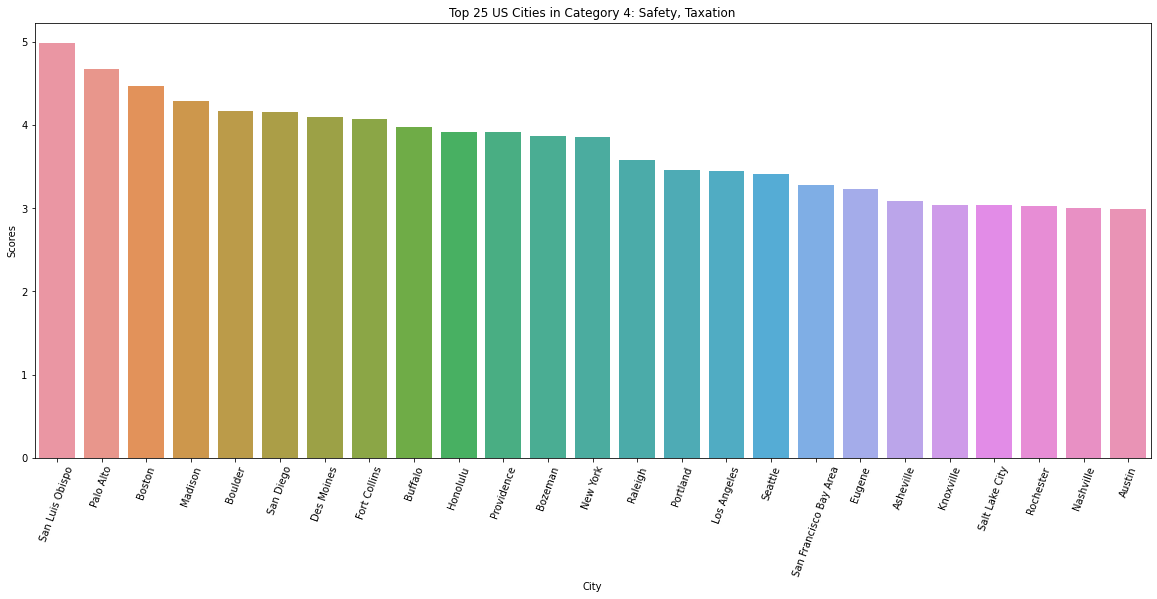

In [169]:
df12_us_c4_score = pd.DataFrame(zip(df12_us_c4['category4'], df12_us_c4['UA_Name']))
df12_us_c4_score.columns = ['Scores', 'City']
new_index=(df12_us_c4_score['Scores']).index.values
df12_us_c4_score = df12_us_c4_score.reindex(new_index)
# df12_us_c2_score
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Scores',data=df12_us_c4_score[:25])
plt.title('Top 25 US Cities in Category 4: Safety, Taxation')
plt.xticks(rotation=70)
plt.show()

In [170]:
rank = 1
rank_c4 = []
for idx, row in df12_us_c4.iterrows():
    temp_dict = {}
    temp_dict["Rank"] = rank
    temp_dict["City"] = row["UA_Name"]
    temp_dict["State"] = row["UA_Country"]
    rank_c4.append(temp_dict)
    rank+=1
# rank_c4

Visualizations on US cities - Manual Selected Features

In [171]:
df13 = df9.copy()
df13["UA_Name"] = df["UA_Name"]
df13["UA_Country"] = df["UA_Country"].map(lambda x: x.strip())
df13["UA_Continent"] = df["UA_Continent"]
# df13

In [172]:
df13_us_selected_category = df13.loc[df13["UA_Country"].isin(us_state)]
df13_us_selected_category = df13_us_selected_category.loc[df13_us_selected_category["UA_Continent"].isin(["North America"])]
# df13_us_selected_category

The order of cities for Vacation Lovers

In [173]:
df13_us_c1 = df13_us_selected_category.sort_values("Vacation Lovers", ascending=False)
df13_us_c1 = df13_us_c1.drop(axis=1, columns=['Entrepreneur & Business person','Stability Seeker','Family'])
df13_us_c1

,Vacation Lovers,UA_Name,UA_Country,UA_Continent
139,8.65,Los Angeles,California,North America
212,8.60,San Francisco Bay Area,California,North America
171,8.45,New York,New York,North America
35,8.38,Boston,Massachusetts,North America
182,8.08,Palo Alto,California,North America
...,...,...,...,...
191,4.42,Portland,Maine,North America
5,4.40,Anchorage,Alaska,North America
8,4.40,Asheville,North Carolina,North America
37,4.37,Bozeman,Montana,North America


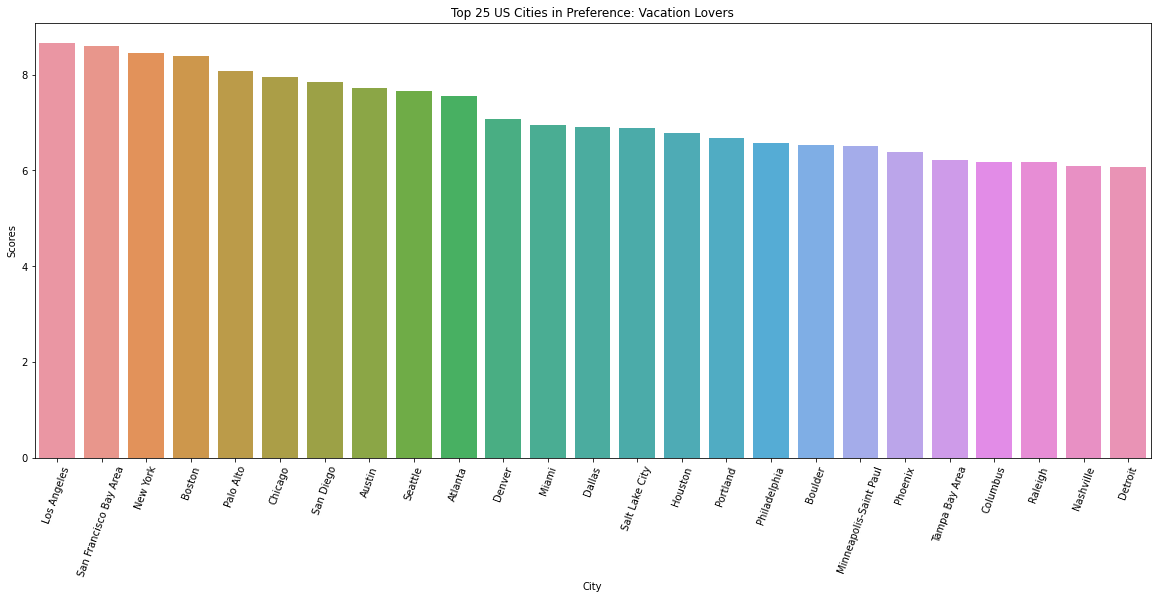

In [174]:
df13_us_c1_score = pd.DataFrame(zip(df13_us_c1['Vacation Lovers'], df13_us_c1['UA_Name']))
df13_us_c1_score.columns = ['Scores', 'City']
new_index=(df13_us_c1_score['Scores']).index.values
df13_us_c1_score = df13_us_c1_score.reindex(new_index)
df13_us_c1_score
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Scores',data=df13_us_c1_score[:25])
plt.title('Top 25 US Cities in Preference: Vacation Lovers')
plt.xticks(rotation=70)
plt.show()

In [175]:
rank = 1
rank_VL = []
for idx, row in df13_us_c1.iterrows():
    temp_dict = {}
    temp_dict["Rank"] = rank
    temp_dict["City"] = row["UA_Name"]
    temp_dict["State"] = row["UA_Country"]
    rank_VL.append(temp_dict)
    rank+=1
# rank_VL

The order of cities for Entrepreneur & Business person

In [176]:
df13_us_c2 = df13_us_selected_category.sort_values("Entrepreneur & Business person", ascending=False)
df13_us_c2 = df13_us_c2.drop(axis=1, columns=['Vacation Lovers','Stability Seeker','Family'])
df13_us_c2

,Entrepreneur & Business person,UA_Name,UA_Country,UA_Continent
171,8.30,New York,New York,North America
60,6.90,Chicago,Illinois,North America
229,6.82,St. Louis,Missouri,North America
186,6.49,Philadelphia,Pennsylvania,North America
212,6.41,San Francisco Bay Area,California,North America
...,...,...,...,...
67,3.00,Colorado Springs,Colorado,North America
8,2.82,Asheville,North Carolina,North America
89,2.57,Fort Collins,Colorado,North America
191,2.15,Portland,Maine,North America


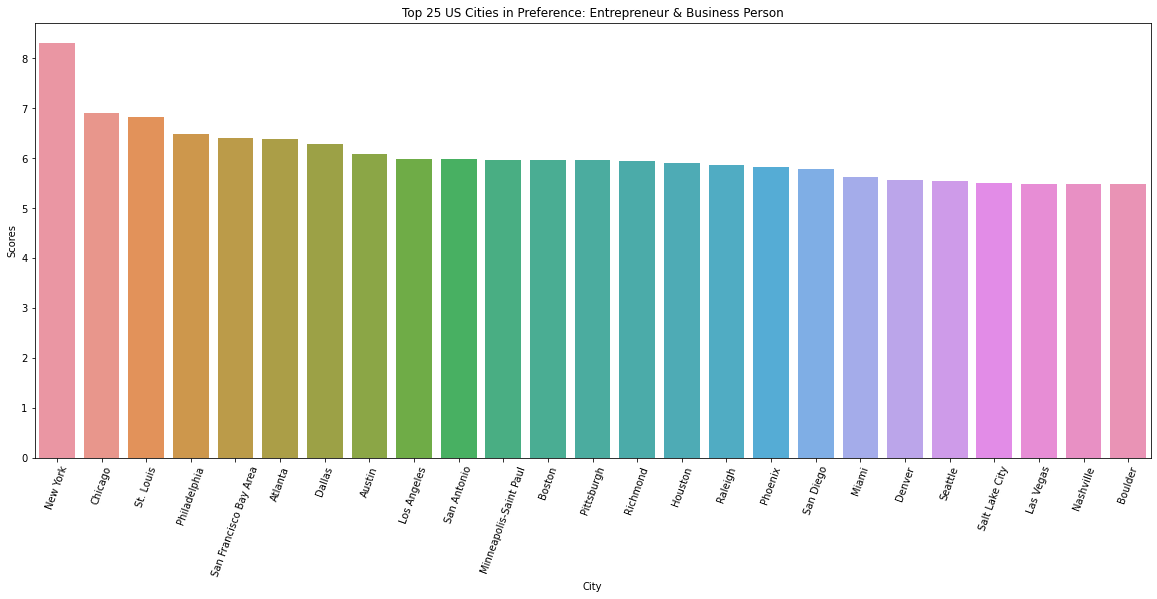

In [177]:
df13_us_c2_score = pd.DataFrame(zip(df13_us_c2['Entrepreneur & Business person'], df13_us_c2['UA_Name']))
df13_us_c2_score.columns = ['Scores', 'City']
new_index=(df13_us_c2_score['Scores']).index.values
df13_us_c2_score = df13_us_c2_score.reindex(new_index)
# df13_us_c2_score
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Scores',data=df13_us_c2_score[:25])
plt.title('Top 25 US Cities in Preference: Entrepreneur & Business Person')
plt.xticks(rotation=70)
plt.show()

In [178]:
rank = 1
rank_EB = []
for idx, row in df13_us_c2.iterrows():
    temp_dict = {}
    temp_dict["Rank"] = rank
    temp_dict["City"] = row["UA_Name"]
    temp_dict["State"] = row["UA_Country"]
    rank_EB.append(temp_dict)
    rank+=1
# rank_EB

The order of cities for Stability Seeker

In [179]:
df13_us_c3 = df13_us_selected_category.sort_values("Stability Seeker", ascending=False)
df13_us_c3 = df13_us_c3.drop(axis=1, columns=['Vacation Lovers','Entrepreneur & Business person','Family'])
df13_us_c3

,Stability Seeker,UA_Name,UA_Country,UA_Continent
67,7.81,Colorado Springs,Colorado,North America
209,7.33,Salt Lake City,Utah,North America
75,6.33,Denver,Colorado,North America
32,6.27,Boise,Idaho,North America
129,6.21,Las Vegas,Nevada,North America
...,...,...,...,...
170,1.95,New Orleans,Louisiana,North America
191,1.48,Portland,Maine,North America
215,0.99,San Luis Obispo,California,North America
196,0.30,Providence,Rhode Island,North America


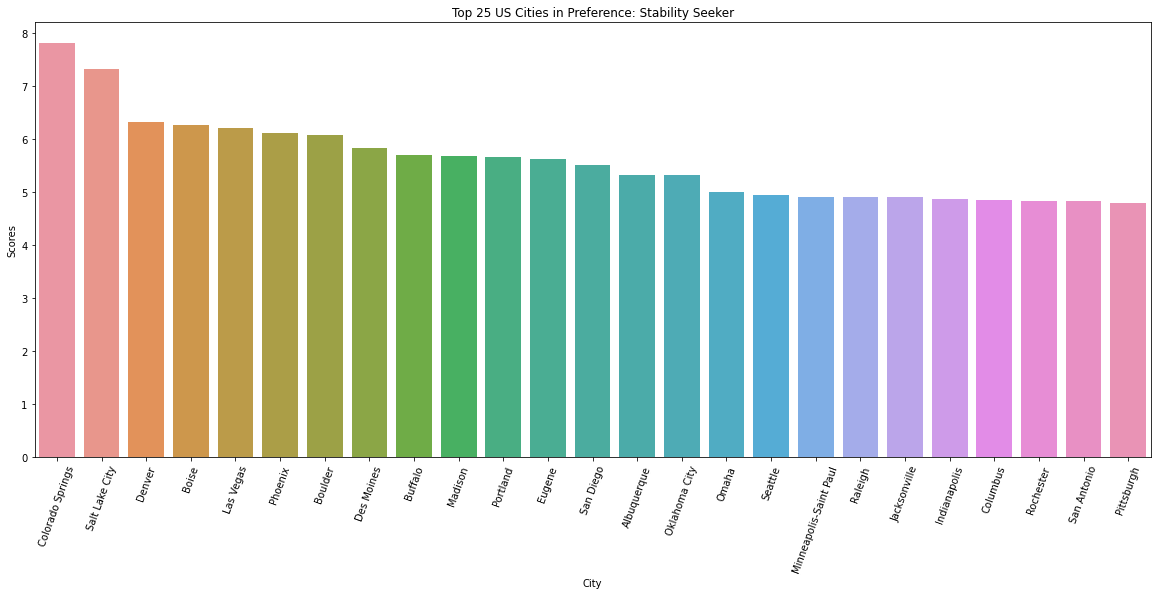

In [180]:
df13_us_c3_score = pd.DataFrame(zip(df13_us_c3['Stability Seeker'], df13_us_c3['UA_Name']))
df13_us_c3_score.columns = ['Scores', 'City']
new_index=(df13_us_c3_score['Scores']).index.values
df13_us_c3_score = df13_us_c3_score.reindex(new_index)
# df13_us_c3_score
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Scores',data=df13_us_c3_score[:25])
plt.title('Top 25 US Cities in Preference: Stability Seeker')
plt.xticks(rotation=70)
plt.show()

In [181]:
rank = 1
rank_SS = []
for idx, row in df13_us_c3.iterrows():
    temp_dict = {}
    temp_dict["Rank"] = rank
    temp_dict["City"] = row["UA_Name"]
    temp_dict["State"] = row["UA_Country"]
    rank_SS.append(temp_dict)
    rank+=1
# rank_SS

The order of cities for Family

In [182]:
df13_us_c4 = df13_us_selected_category.sort_values("Family", ascending=False)
df13_us_c4 = df13_us_c4.drop(axis=1, columns=['Vacation Lovers','Entrepreneur & Business person','Stability Seeker'])
df13_us_c4

,Family,UA_Name,UA_Country,UA_Continent
35,8.76,Boston,Massachusetts,North America
144,7.98,Madison,Wisconsin,North America
199,7.75,Raleigh,North Carolina,North America
36,7.72,Boulder,Colorado,North America
89,7.40,Fort Collins,Colorado,North America
...,...,...,...,...
30,3.39,Birmingham,Alabama,North America
188,2.91,Phoenix,Arizona,North America
170,2.86,New Orleans,Louisiana,North America
129,2.63,Las Vegas,Nevada,North America


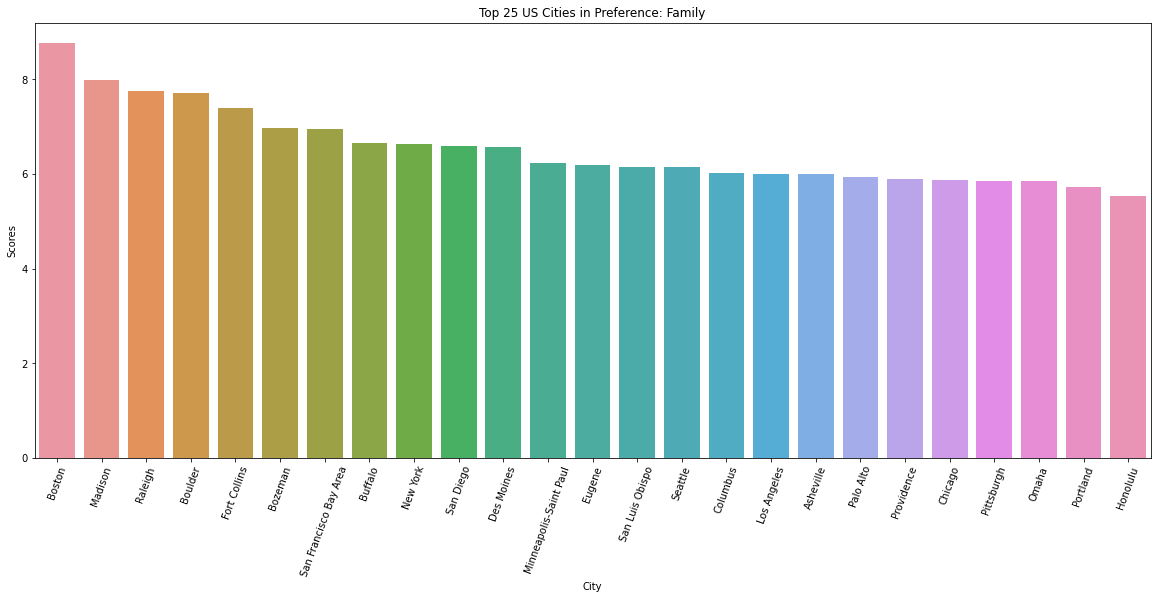

In [183]:
df13_us_c4_score = pd.DataFrame(zip(df13_us_c4['Family'], df13_us_c4['UA_Name']))
df13_us_c4_score.columns = ['Scores', 'City']
new_index=(df13_us_c4_score['Scores']).index.values
df13_us_c4_score = df13_us_c4_score.reindex(new_index)
# df13_us_c4_score
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Scores',data=df13_us_c4_score[:25])
plt.title('Top 25 US Cities in Preference: Family')
plt.xticks(rotation=70)
plt.show()

In [184]:
rank = 1
rank_Fml = []
for idx, row in df13_us_c4.iterrows():
    temp_dict = {}
    temp_dict["Rank"] = rank
    temp_dict["City"] = row["UA_Name"]
    temp_dict["State"] = row["UA_Country"]
    rank_Fml.append(temp_dict)
    rank+=1
# rank_Fml

Create maps upon ranks with preference

In [185]:
m12 = df12_us_c1.merge(df12_us_c2, left_on="UA_Name",right_on="UA_Name")
m13 = m12.merge(df12_us_c3, left_on="UA_Name",right_on="UA_Name")
m14 = m13.merge(df12_us_c4, left_on="UA_Name",right_on="UA_Name")
m14.head()
cols_to_norm = ["category1","category2","category3","category4"]
m14[cols_to_norm] = m14[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

m15 = m14[["UA_Name","category1","category2","category3","category4"]]
#reverse order like 4-order
Order = {"category1":4,"category2":3,"category3":2,"category4":1}
m15["score"]= m14["category1"]*Order["category1"]+m14["category2"]*Order["category2"]+m14["category3"]*Order["category3"]+m14["category4"]*Order["category4"]
m15.head()

/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/ipykernel_16001/1052416960.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UA_Country_x', 'UA_Continent_x'} in the result is deprecated and will raise a MergeError in a future version.
  m14 = m13.merge(df12_us_c4, left_on="UA_Name",right_on="UA_Name")
/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/ipykernel_16001/1052416960.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m15["score"]= m14["category1"]*Order["category1"]+m14["category2"]*Order["category2"]+m14["category3"]*Order["category3"]+m14["category4"]*Order["category4"]


,UA_Name,category1,category2,category3,category4,score
0,Oklahoma City,1.000000,0.242820,0.535809,0.469880,6.269957
1,Louisville,0.997072,0.097911,0.310345,0.295181,5.197891
2,Boise,0.991215,0.326371,0.389920,0.403614,6.127428
3,Knoxville,0.982430,0.000000,0.249337,0.610442,5.038837
4,Albuquerque,0.975110,0.240209,0.493369,0.000000,5.607803


In [186]:
m112 = df13_us_c1.merge(df13_us_c2, left_on="UA_Name",right_on="UA_Name")
m113 = m112.merge(df13_us_c3, left_on="UA_Name",right_on="UA_Name")
m114 = m113.merge(df13_us_c4, left_on="UA_Name",right_on="UA_Name")
m114.head()
cols_to_norm = ["Vacation Lovers","Entrepreneur & Business person","Stability Seeker","Family"]
m114[cols_to_norm] = m114[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

m115 = m114[["UA_Name","Vacation Lovers","Entrepreneur & Business person","Stability Seeker","Family"]]
Order = {"Vacation Lovers":4,"Entrepreneur & Business person":3,"Stability Seeker":2,"Family":1}
m115["score"]= m114["Vacation Lovers"]*Order["Vacation Lovers"]+m114["Entrepreneur & Business person"]*Order["Entrepreneur & Business person"]+m114["Stability Seeker"]*Order["Stability Seeker"]+m114["Family"]*Order["Family"]

/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/ipykernel_16001/4113166087.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UA_Country_x', 'UA_Continent_x'} in the result is deprecated and will raise a MergeError in a future version.
  m114 = m113.merge(df13_us_c4, left_on="UA_Name",right_on="UA_Name")
/var/folders/6v/j783srq56c39g68f5wpcqj6r0000gn/T/ipykernel_16001/4113166087.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m115["score"]= m114["Vacation Lovers"]*Order["Vacation Lovers"]+m114["Entrepreneur & Business person"]*Order["Entrepreneur & Business person"]+m114["Stability Seeker"]*Order["Stability Seeker"]+m114["Family"]*Order["Family"]


In [187]:
dfx= m115.sort_values("score", ascending=False)
dfx = m115.drop(axis=1, columns=['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family'])
dfx
df13=dfx
df13

,UA_Name,score
0,Los Angeles,7.630376
1,San Francisco Bay Area,7.832321
2,New York,8.133621
3,Boston,7.761499
4,Palo Alto,4.810200
...,...,...
73,Omaha,3.399060
74,Anchorage,3.129823
75,Asheville,2.716819
76,Bozeman,1.888478


In [188]:
df14 = pd.read_csv("uscities.csv")
df14 = df14[["city","lat","lng"]]
df15 = df14.groupby('city').first()

df16 = df13.merge(df15, left_on="UA_Name", right_on="city")
df16.rename({'UA_Name': 'City'}, axis=1, inplace=True)
df16 = df16.sort_values("score", ascending=False)
df16['Rank'] = np.arange(1, len(df16)+1)
df16.to_csv('set1.csv')

df16.head(10)

,City,score,lat,lng,Rank
1,New York,8.133621,40.6943,-73.9249,1
2,Boston,7.761499,42.3188,-71.0846,2
0,Los Angeles,7.630376,34.1139,-118.4068,3
4,Chicago,7.401877,41.8373,-87.6862,4
5,San Diego,7.303672,32.8312,-117.1225,5
7,Seattle,6.836916,47.6211,-122.3244,6
6,Austin,6.780299,30.3004,-97.7522,7
12,Salt Lake City,6.612583,40.7777,-111.9306,8
9,Denver,6.536387,39.7621,-104.8759,9
8,Atlanta,6.456869,33.7627,-84.4224,10


In [189]:
dfy= m15.sort_values("score", ascending=False)
dfy = m15.drop(axis=1, columns=['category1','category2','category3','category4'])
dfy
df17=dfy
df17

df14 = pd.read_csv("uscities.csv")
df14 = df14[["city","lat","lng"]]
df15 = df14.groupby('city').first()

df18 = df17.merge(df15, left_on="UA_Name", right_on="city")
df18.rename({'UA_Name': 'City'}, axis=1, inplace=True)
df18 = df18.sort_values("score", ascending=False)

df18['Rank'] = np.arange(1, len(df16)+1)
df18.to_csv('set2.csv')
df18.head(10)

,City,score,lat,lng,Rank
26,Raleigh,7.417747,35.8325,-78.6435,1
17,Salt Lake City,7.296498,40.7777,-111.9306,2
61,Boulder,6.928005,40.0249,-105.2523,3
22,Madison,6.897593,43.0826,-89.3931,4
63,San Diego,6.884803,32.8312,-117.1225,5
67,Boston,6.823612,42.3188,-71.0846,6
15,St. Louis,6.738098,38.6358,-90.2451,7
40,Austin,6.695515,30.3004,-97.7522,8
60,Chicago,6.660140,41.8373,-87.6862,9
34,Pittsburgh,6.567916,40.4396,-79.9762,10


Preference: family > stability > entrepreneur > vacation

In [190]:
!pip3 install folium
import folium
import pandas as pd
from IPython.display import display
cities = pd.read_csv("set1.csv",sep=",")
my_map = folium.Map(
    location = [13.1339324, 16.10393872],
    zoom_start=2
)
count=0
for _,city in cities.iterrows():
    if count==10:
        break
    count += 1
    popup = str(city['Rank'])+";"+city["City"],
    folium.Marker(
        location=[float(city['lat']),float(city['lng'])],
        popup = city['Rank'],
        icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue"><b>{popup}<b></div>""")
    ).add_to(my_map)
display(my_map)

Preference: catgeory4 > category3> category2 > category1

In [191]:
!pip3 install folium
import folium
import pandas as pd
from IPython.display import display
cities = pd.read_csv("set2.csv",sep=",")
my_map = folium.Map(
    location = [13.1339324, 16.10393872],
    zoom_start=2
)
count=0
for _,city in cities.iterrows():
    if count==10:
        break
    count += 1
    popup = str(city['Rank'])+";"+city["City"],
    folium.Marker(
        location=[float(city['lat']),float(city['lng'])],
        popup = city['Rank'],
        icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue"><b>{popup}<b></div>""")
    ).add_to(my_map)
display(my_map)